In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### DataFrame vs Series

## Dataframes and series are used in data preprocessing 
<b>1) DataFrame </b><br>
a) It consists of rows and columns. <br>
b) Dataframe can contain just 1 column only<br>
c) Every dataframe will bear index.<br>

<b>2) Series</b><br>
a) Single column data is represented in series.<br>
b) Every Series will bear index.

### Gradient Descent Implementation

In [82]:
a1d = np.array([4,5,6,7,8])
a2d = np.array([[2,3,4],[5,6,7]])
print(a1d.ndim)
print(a2d.ndim)
print(a1d,a1d.shape)
print(a2d,a2d.shape)

1
2
[4 5 6 7 8] (5,)
[[2 3 4]
 [5 6 7]] (2, 3)


In [83]:
data = {'CGPA': [8.3,9.4,7.5,8.9,9.7,6.4],
       'CTC': [4.35,5.4,3.50,3.75,4.5,3.5]}
print(type(data))

<class 'dict'>


In [84]:
df = pd.DataFrame(data)
df.head()  # top 5 rows

,CGPA,CTC
0,8.3,4.35
1,9.4,5.40
2,7.5,3.50
3,8.9,3.75
4,9.7,4.50


### Predict CTC based on CGPA?

In [85]:
print(type(df[['CTC']]))
print(type(df['CTC']))
print(type(df[['CGPA','CTC']]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [86]:
x = df[['CGPA']].values   # 2D np array
y = df['CTC'].values      # 1D np array
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6, 1)
(6,)


In [87]:
print(x)
print(y)

[[8.3]
 [9.4]
 [7.5]
 [8.9]
 [9.7]
 [6.4]]
[4.35 5.4  3.5  3.75 4.5  3.5 ]


### Applying Gradient Descent

In [88]:
# w= weight, b = bias
# Grad Descent =>
# w_new = w_old - alpha*(dL/d_w_old)
# b_new = b_old - alpha*(dL/d_b_old)

# ypred  = wx + b
# Loss = (1/n)*Sum((y - ypred)^2)
# Loss = (1/n)*Sum((y - (wx + b))^2)  = 120
# dL/dw = -(2/n)*sum(y - ypred)*x
# dL/db = -(2/n)*sum(y - ypred)*

# w_new = w_old - alpha*(dL/dw)
# b_new = b_old - alpha*(dL/db)

# Loss = Cost = Error
# alpha = learning rate

In [89]:
# lr = learning_rate = alpha
# epoch = number of itertaions
cost_val = []

def grad_desc(x,y,lr,epoch):
    w,b = 1,1
    for i in range(epoch):
        print(f'w is {w} and b is {b}')
        ypred = np.dot(w, x.T) + b    # ypred = wx + b
        cost = np.mean(np.square(y-ypred))   # loss
        loss_w = -(2/len(x)) * np.sum((y-ypred)*x.T)   # dl/dw
        loss_b = -(2/len(x)) * np.sum((y-ypred))       # dl/db
        w = w - lr*loss_w
        b = b - lr*loss_b
        cost_val.append(cost)
        print(f'ypred {ypred}')
        print(f'Cost {cost}')
        print(f'loss_w {loss_w} and loss_b {loss_b}')
        print(f'Iteration {i}')
        print('*'*70)

In [90]:
grad_desc(x,y,lr=0.001,epoch=10)

w is 1 and b is 1
ypred [[ 9.3 10.4  8.5  9.9 10.7  7.4]]
Cost 27.662500000000005
loss_w 88.47333333333333 and loss_b 10.4
Iteration 0
**********************************************************************
w is 0.9115266666666667 and b is 0.9896
ypred [[8.55527133 9.55795067 7.82605    9.10218733 9.83140867 6.82337067]]
Cost 20.300364924341924
loss_w 75.68418897777778 and loss_b 8.898746222222224
Iteration 1
**********************************************************************
w is 0.835842477688889 and b is 0.9807012537777778
ypred [[7.91819382 8.83762054 7.24951984 8.41969931 9.08837329 6.33009311]]
Cost 14.912804862988812
loss_w 64.74372706528119 and loss_b 7.614499967549631
Iteration 2
**********************************************************************
w is 0.7710987506236078 and b is 0.9730867538102282
ypred [[7.37320638 8.22141501 6.75632738 7.83586563 8.45274463 5.90811876]]
Cost 10.970225267926153
loss_w 55.38471886934264 and loss_b 6.515892601388828
Iteration 3
***********

In [91]:
print(cost_val)

[27.662500000000005, 20.300364924341924, 14.912804862988812, 10.970225267926153, 8.085072477536242, 5.973737377645963, 4.42867676170603, 3.2980119331860163, 2.4705991025911778, 1.8651040062923796]


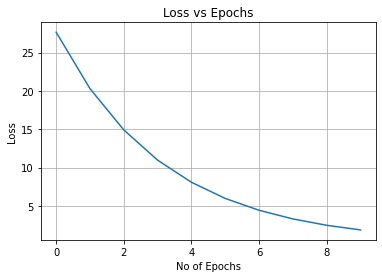

In [92]:
plt.plot(list(range(10)),cost_val)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()